AIML Module Project - Computer Vision - Project

**Face Mask Prediction**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***IMPORTING DATASET***

In [3]:
import numpy as np
import pandas as pd

In [4]:
data = np.load('/content/drive/MyDrive/acv project 1/Dataset- Images.npy', allow_pickle=True)

In [5]:
data.shape

(409, 2)

In [6]:
print(data[0][0])
# checking image data

[[[42 37 34]
  [56 51 48]
  [71 66 63]
  ...
  [23 33 34]
  [26 36 37]
  [28 38 39]]

 [[40 35 32]
  [51 46 43]
  [64 59 56]
  ...
  [27 36 35]
  [24 33 32]
  [26 35 34]]

 [[43 38 35]
  [51 46 43]
  [61 56 53]
  ...
  [28 30 27]
  [33 35 32]
  [35 37 34]]

 ...

 [[56 47 40]
  [57 48 41]
  [61 52 45]
  ...
  [67 48 42]
  [55 35 28]
  [60 40 33]]

 [[53 44 37]
  [54 45 38]
  [57 48 41]
  ...
  [59 40 34]
  [60 40 33]
  [54 34 27]]

 [[53 44 37]
  [54 45 38]
  [57 48 41]
  ...
  [59 40 34]
  [70 50 43]
  [64 44 37]]]


In [7]:
print(data[15][1])
# checking features and label data

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.26266666666666666, 'y': 0.08266666666666667}, {'x': 0.3973333333333333, 'y': 0.3893333333333333}], 'imageWidth': 750, 'imageHeight': 375}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.49866666666666665, 'y': 0.050666666666666665}, {'x': 0.5973333333333334, 'y': 0.2613333333333333}], 'imageWidth': 750, 'imageHeight': 375}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.6773333333333333, 'y': 0.112}, {'x': 0.7906666666666666, 'y': 0.368}], 'imageWidth': 750, 'imageHeight': 375}]


Initializing image height, image width with value: ***224***

In [8]:
IMAGE_WIDTH = 224
IMAGE_HEIGHT = 224

***Create features and labels¶***
Here feature is the image
The label is the mask
Images will be stored in "X" array
Masks will be stored in "masks" array

In [9]:

import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

***TRAIN TEST SPLIT***

In [10]:
X_train = X[:400]
y_train = masks[:400]

In [11]:
X_test = X[400:]
y_test = masks[400:]

In [12]:
print(X_train.shape)
print(y_train.shape)

(400, 224, 224, 3)
(400, 224, 224)


In [13]:
print(X_test.shape)
print(y_test.shape)

(9, 224, 224, 3)
(9, 224, 224)


***Printing image and image array***

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Image array: [[[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 [[-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  [-0.98431373 -0.98431373 -0.98431373]
  ...
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]]

 ...

 [[-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  [-1.         -1.         -1.        ]
  ...
  [-0.96862745 -0.96862745 -0.96862745]
  [-0.96078432 -0.96078432 -0.96078432]
  [-0.96078432 -0.96078432 -0.9

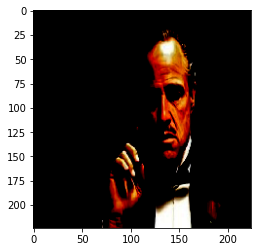

In [14]:
import matplotlib.pyplot as plt

n = 10    
print("Image array:", X_train[n])
plt.imshow(X_train[n])

***Printing mask value***

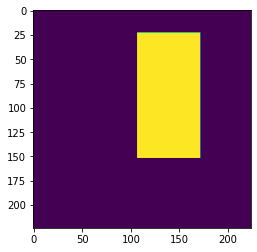

In [15]:
plt.imshow(masks[n])

3. Mask detection model:
● Design a face mask detection model. 
 Hint: Use U-net along with pre-trained transfer learning models
● Design your own Dice Coefficient and Loss function. 
● Train, tune and test the model.
● Evaluate the model using testing data.

Create the model
 Mobilenet parameter values:
input_shape: IMAGE_HEIGHT, IMAGE_WIDTH, 3
include_top: False
alpha: 1.0
weights: "imagenet"
Adding UNET architecture layers


In [16]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D
from tensorflow.keras.models import Model

def create_model(trainable=True):
    model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in model.layers:
        layer.trainable = trainable
  
    block0 = model.get_layer("conv_pw_1_relu").output
    block1 = model.get_layer("conv_pw_3_relu").output
    block2 = model.get_layer("conv_pw_5_relu").output
    block3 = model.get_layer("conv_pw_11_relu").output
    block4 = model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block2])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block1])
    print(x.shape)
    x = Concatenate()([UpSampling2D()(x), block0])
    print(x.shape)
    x = UpSampling2D()(x)
    print(x.shape)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)
    print(x.shape)

    return Model(inputs=model.input, outputs=x)

In [17]:
model = create_model()

(None, 14, 14, 1536)
(None, 28, 28, 1792)
(None, 56, 56, 1920)
(None, 112, 112, 1984)
(None, 224, 224, 1984)
(None, 224, 224)


In [18]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
______________________________________________________________________________________________

###  Dice coefficient function 
- Creating a function to calculate dice coefficient

In [19]:
from tensorflow import reduce_sum
from tensorflow.keras.backend import epsilon

def dice_coefficient(y_true, y_pred):
    numerator = 2 * reduce_sum(y_true * y_pred)
    denominator = reduce_sum(y_true + y_pred)
    return numerator / (denominator + epsilon())

### Loss function 

In [20]:
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.backend import log

def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - log(dice_coefficient(y_true, y_pred) + epsilon())

##Compiling the model

In [21]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=1e-4, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=loss, optimizer=optimizer, metrics=[dice_coefficient])

### Defining callbacks
- Use ***ModelCheckpoint***
- Use *EarlyStopping*
- Use ***ReduceLROnPlateau***

In [22]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("model-{loss:.2f}.h5", monitor="loss", verbose=1, save_best_only=True,
                             save_weights_only=True, mode="min")
stop = EarlyStopping(monitor="loss", patience=5, mode="min")
reduce_lr = ReduceLROnPlateau(monitor="loss", factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode="min")

**Fit the model**

In [23]:
model.fit(x=X_train,y=y_train,
          epochs=10, batch_size=1,
          callbacks=[checkpoint, reduce_lr, stop],
           use_multiprocessing=True)
# training the model

Epoch 1/10
400/400 [==============================] - 47s 105ms/step - loss: 1.3599 - dice_coefficient: 0.4408

Epoch 00001: loss improved from inf to 1.35986, saving model to model-1.36.h5
Epoch 2/10
400/400 [==============================] - 42s 105ms/step - loss: 0.8192 - dice_coefficient: 0.6053

Epoch 00002: loss improved from 1.35986 to 0.81925, saving model to model-0.82.h5
Epoch 3/10
400/400 [==============================] - 42s 105ms/step - loss: 0.6305 - dice_coefficient: 0.6738

Epoch 00003: loss improved from 0.81925 to 0.63046, saving model to model-0.63.h5
Epoch 4/10
400/400 [==============================] - 42s 105ms/step - loss: 0.5667 - dice_coefficient: 0.7003

Epoch 00004: loss improved from 0.63046 to 0.56672, saving model to model-0.57.h5
Epoch 5/10
400/400 [==============================] - 42s 105ms/step - loss: 0.5251 - dice_coefficient: 0.7173

Epoch 00005: loss improved from 0.56672 to 0.52505, saving model to model-0.53.h5
Epoch 6/10
400/400 [==============

In [36]:
# loading model with lowest loss
WEIGHTS_FILE = "model-0.43.h5"
THRESHOLD = 0.8
EPSILON = 0.02

model.load_weights(WEIGHTS_FILE)
model.save('fdmodel.h5')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



 Sample Image: 10


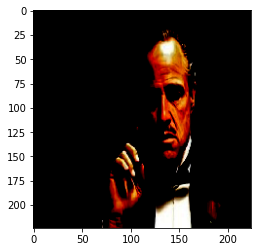


 Given Mask: 10


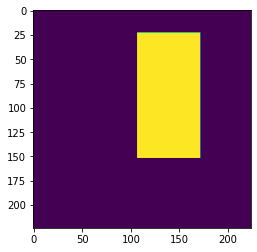


 Predicted Mask: 10


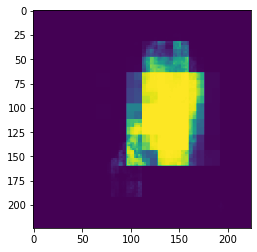

In [40]:
# getting predicted mask for sample image
n = 10
sample_image = X_train[n]

#### Code below ####
print("\n Sample Image: "+ str(n)) # Sample image
plt.imshow(sample_image) 
plt.show()

print("\n Given Mask: "+ str(n)) # Given Mask
plt.imshow(masks[n])
plt.show()

print("\n Predicted Mask: "+ str(n)) # Predicted Mask
a=model.predict(sample_image.reshape(1,224,224,3))
plt.imshow(a.reshape(224,224)) 
plt.show()

***Model prediction on test image***

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


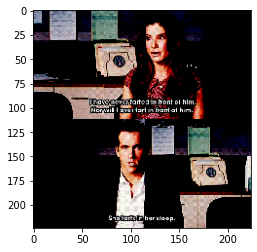

In [41]:
# getting predicted mask for test image
from keras.preprocessing import image

test_image_path = '/content/drive/MyDrive/acv project 1/Prediction_Image.jpeg'
test_image = image.load_img(test_image_path, target_size = (IMAGE_WIDTH, IMAGE_HEIGHT)) 
test_image = image.img_to_array(test_image)
test_image = cv2.resize(test_image, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
test_image = preprocess_input(np.array(test_image, dtype=np.float32))
test_image_in = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image_in)

plt.imshow(test_image)

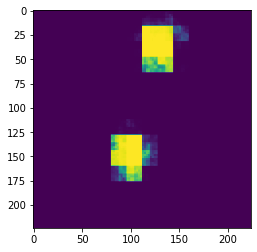

In [42]:
plt.imshow(result.reshape(224,224))

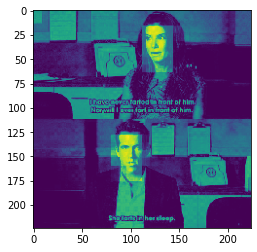

In [43]:
overlay_img = test_image[:,:,2] + result.reshape(224,224)
plt.imshow(overlay_img)

***project part 2***

*** 
## AIML Module Project - Computer vision - Image annotation generation - Project ***

***Importing images ***

In [28]:
import os,cv2,keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [29]:
import cv2 # Open cv version 2
import os
import glob
img_dir = "/content/drive/MyDrive/acv project 1/training_images" # Enter Directory of all images 
data_path = os.path.join(img_dir,'*g') # '*' is used to extract all files in the directory
files = glob.glob(data_path)
data = []  # EMPTY LIST
for f1 in files:
    img = cv2.imread(f1)
    data.append(img)

In [30]:
data[400]

array([[[ 96,  99, 103],
        [ 92,  95,  99],
        [ 93,  98, 101],
        ...,
        [127, 131, 136],
        [122, 126, 131],
        [127, 130, 138]],

       [[ 92,  97, 100],
        [ 91,  96,  99],
        [ 94,  99, 102],
        ...,
        [125, 129, 134],
        [122, 126, 131],
        [127, 130, 138]],

       [[ 93,  98, 101],
        [ 91,  99,  99],
        [ 93, 101, 101],
        ...,
        [125, 130, 133],
        [123, 127, 132],
        [128, 132, 137]],

       ...,

       [[122, 114, 121],
        [118, 112, 117],
        [115, 114, 118],
        ...,
        [108, 114, 121],
        [106, 111, 120],
        [103, 110, 119]],

       [[122, 111, 119],
        [118, 112, 117],
        [115, 114, 116],
        ...,
        [108, 114, 119],
        [105, 111, 118],
        [104, 112, 119]],

       [[121, 111, 117],
        [120, 113, 116],
        [118, 115, 117],
        ...,
        [107, 114, 117],
        [105, 111, 116],
        [106, 115, 119]]

In [31]:
dir_list = next(os.walk(img_dir))[2]
dir_list

['real_00579.jpg',
 'real_00471.jpg',
 'real_00563.jpg',
 'real_00560.jpg',
 'real_00538.jpg',
 'real_00548.jpg',
 'real_00565.jpg',
 'real_00470.jpg',
 'real_00480.jpg',
 'real_00512.jpg',
 'real_00554.jpg',
 'real_00571.jpg',
 'real_00573.jpg',
 'real_00509.jpg',
 'real_00553.jpg',
 'real_00589.jpg',
 'real_00489.jpg',
 'real_00574.jpg',
 'real_00549.jpg',
 'real_00588.jpg',
 'real_00582.jpg',
 'real_00585.jpg',
 'real_00580.jpg',
 'real_00506.jpg',
 'real_00507.jpg',
 'real_00540.jpg',
 'real_00545.jpg',
 'real_00468.jpg',
 'real_00469.jpg',
 'real_00523.jpg',
 'real_00544.jpg',
 'real_00485.jpg',
 'real_00482.jpg',
 'real_00521.jpg',
 'real_00578.jpg',
 'real_00499.jpg',
 'real_00607.jpg',
 'real_00605.jpg',
 'real_00595.jpg',
 'real_00488.jpg',
 'real_00601.jpg',
 'real_00525.jpg',
 'real_00541.jpg',
 'real_00551.jpg',
 'real_00508.jpg',
 'real_00493.jpg',
 'real_00527.jpg',
 'real_00598.jpg',
 'real_00477.jpg',
 'real_00606.jpg',
 'real_00532.jpg',
 'real_00556.jpg',
 'real_00492

In [32]:
len(dir_list)

1490

#### 2. Curating annotations 

In [33]:
x_cord=[]
y_cord=[]
height=[]
width=[]
face_detected=[]
image_name=[]

In [34]:
import cv2 # Open cv version 2

for i in range (len(dir_list)):
    print("Execution loop=",i)
    # Create a cascade classfier object
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')   # frontal face 
    data_path = os.path.join(img_dir,dir_list[i])
    img=cv2.imread(data_path)
    faces=face_cascade.detectMultiScale(img,scaleFactor=1.05,minNeighbors=5)

    j=0 

    # Find coordinates of the face
    for x,y,w,h in faces:
        img=cv2.rectangle(img,(x,y),(x+w,y+h),(255, 0, 0),2)
        j=j+1
    resized=cv2.resize(img,(int(img.shape[1]/2),int(img.shape[0])))
    
    length=len(faces)
    if length==0:
        a=0
        b=0
        c=0
        d=0
        j=0
        name=0
        
    else:
        a=faces[0,0]
        b=faces[0,1]
        c=faces[0,2]
        d=faces[0,3]
        name=dir_list[i]
        
    
    x_cord.append(a)
    y_cord.append(b)
    width.append(c)
    height.append(d)
    face_detected.append(j)
    image_name.append(name)

Execution loop= 0
Execution loop= 1
Execution loop= 2
Execution loop= 3
Execution loop= 4
Execution loop= 5
Execution loop= 6
Execution loop= 7
Execution loop= 8
Execution loop= 9
Execution loop= 10
Execution loop= 11
Execution loop= 12
Execution loop= 13
Execution loop= 14
Execution loop= 15
Execution loop= 16
Execution loop= 17
Execution loop= 18
Execution loop= 19
Execution loop= 20
Execution loop= 21
Execution loop= 22
Execution loop= 23
Execution loop= 24
Execution loop= 25
Execution loop= 26
Execution loop= 27
Execution loop= 28
Execution loop= 29
Execution loop= 30
Execution loop= 31
Execution loop= 32
Execution loop= 33
Execution loop= 34
Execution loop= 35
Execution loop= 36
Execution loop= 37
Execution loop= 38
Execution loop= 39
Execution loop= 40
Execution loop= 41
Execution loop= 42
Execution loop= 43
Execution loop= 44
Execution loop= 45
Execution loop= 46
Execution loop= 47
Execution loop= 48
Execution loop= 49
Execution loop= 50
Execution loop= 51
Execution loop= 52
Exe

In [44]:


df = pd.DataFrame(x_cord, columns = ['x'])

df['y']=y_cord
df['w']=width
df['h']=height
df['Total_Faces']=face_detected
df['Image_Name']=image_name

df.head(20)

,x,y,w,h,Total_Faces,Image_Name
0,63,85,441,441,1,real_00579.jpg
1,112,316,97,97,1,real_00471.jpg
2,40,173,332,332,1,real_00563.jpg
3,0,0,0,0,0,0
4,256,145,302,302,2,real_00538.jpg
5,72,113,453,453,1,real_00548.jpg
6,88,112,404,404,1,real_00565.jpg
7,48,91,466,466,1,real_00470.jpg
8,76,159,422,422,1,real_00480.jpg
9,58,30,487,487,1,real_00512.jpg


Export the coordinates to excel, csv or json file

In [45]:
df.to_excel("Bounding boxes.xlsx")
df.to_csv("Bounding boxes.csv")
df.to_json("Bounding boxes.json")